In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

def api_runner():
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    #     parsing 20 rows only
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e00c4555-542f-4808-b147-ecb02865efc9',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    #   print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    pd.set_option('display.max_columns',None)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df2 = pd.concat([df])
    #     use concat method instead of append method

    if not os.path.isfile(r'/Users/yyu716/Desktop/API.csv'):
        df2.to_csv(r'/Users/yyu716/Desktop/API.csv',header='column_names')
    else:
        df2.to_csv(r'/Users/yyu716/Desktop/API.csv',mode='a',header=False)

        return data,df

data,df = api_runner()

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed.')
    sleep(60)
exit()    

API runner completed.


KeyboardInterrupt: 

In [8]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 'display.float_format' is the option that we want to set, which controls the formatting of floating-point numbers
# lambda x: '%.5f' % x is a lambda function that takes a floating-point number x as input and formats it as a string with 5 decimal places using the % formatting operator.
# %.5f is a string formatting code that specifies to display the number as a float with 5 decimal places.
#   % x applies the formatting to the input number x and returns the formatted string.

In [9]:
df3 =df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12873,8.84256,0.40696,3.44458,23.61440,30.71807
Ethereum,-0.02205,8.22484,2.93933,5.56019,14.69434,26.17182
Tether,-0.10190,-0.81266,0.38899,0.38522,0.39546,0.37670
BNB,0.21544,8.76119,6.94236,-0.76175,6.95128,13.89073
USD Coin,-0.24362,1.85982,-0.83597,-0.84692,-0.84583,-0.84101
XRP,0.12116,0.61757,1.56078,-3.49441,-1.69207,-3.53030
Cardano,-0.22917,9.94314,2.03850,-5.67609,4.10554,12.14563
Polygon,-0.16567,6.99878,1.61220,-8.09505,28.39267,26.78900
Dogecoin,0.20943,5.81673,-4.03558,-13.41822,-10.95123,-20.91257


In [10]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.12873
              quote.USD.percent_change_24h     8.84256
              quote.USD.percent_change_7d      0.40696
              quote.USD.percent_change_30d     3.44458
              quote.USD.percent_change_60d    23.61440
              quote.USD.percent_change_90d    30.71807
Ethereum      quote.USD.percent_change_1h     -0.02205
              quote.USD.percent_change_24h     8.22484
              quote.USD.percent_change_7d      2.93933
              quote.USD.percent_change_30d     5.56019
              quote.USD.percent_change_60d    14.69434
              quote.USD.percent_change_90d    26.17182
Tether        quote.USD.percent_change_1h     -0.10190
              quote.USD.percent_change_24h    -0.81266
              quote.USD.percent_change_7d      0.38899
              quote.USD.percent_change_30d     0.38522
              quote.USD.percent_change_60d     0.39546
              quote.US

In [11]:
type(df4)

pandas.core.series.Series

In [12]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.12873
             quote.USD.percent_change_24h   8.84256
             quote.USD.percent_change_7d    0.40696
             quote.USD.percent_change_30d   3.44458
             quote.USD.percent_change_60d  23.61440
             quote.USD.percent_change_90d  30.71807
Ethereum     quote.USD.percent_change_1h   -0.02205
             quote.USD.percent_change_24h   8.22484
             quote.USD.percent_change_7d    2.93933
             quote.USD.percent_change_30d   5.56019
             quote.USD.percent_change_60d  14.69434
             quote.USD.percent_change_90d  26.17182
Tether       quote.USD.percent_change_1h   -0.10190
             quote.USD.percent_change_24h  -0.81266
             quote.USD.percent_change_7d    0.38899
             quote.USD.percent_change_30d   0.38522
             quote.USD.percent_change_60d   0.39546
             quote.USD.percent_change_90d   0.37670
BNB          quote.USD.percent_change_1h    0.21544
             quote.USD.percent_change_24h   8.76119
             quote.USD.percent_change_7d    6.94236
             quote.USD.percent_change_30d  -0.76175
             quote.USD.percent_change_60d   6.95128
             quote.USD.percent_change_90d  13.89073
USD Coin     quote.USD.percent_change_1h   -0.24362
             quote.USD.percent_change_24h   1.85982
             quote.USD.percent_change_7d   -0.83597
             quote.USD.percent_change_30d  -0.84692
             quote.USD.percent_change_60d  -0.84583
             quote.USD.percent_change_90d  -0.84101
XRP          quote.USD.percent_change_1h    0.12116
             quote.USD.percent_change_24h   0.61757
             quote.USD.percent_change_7d    1.56078
             quote.USD.percent_change_30d  -3.49441
             quote.USD.percent_change_60d  -1.69207
             quote.USD.percent_change_90d  -3.53030
Cardano      quote.USD.percent_change_1h   -0.22917
             quote.USD.percent_change_24h   9.94314
             quote.USD.percent_change_7d    2.03850
             quote.USD.percent_change_30d  -5.67609
             quote.USD.percent_change_60d   4.10554
             quote.USD.percent_change_90d  12.14563
Polygon      quote.USD.percent_change_1h   -0.16567
             quote.USD.percent_change_24h   6.99878
             quote.USD.percent_change_7d    1.61220
             quote.USD.percent_change_30d  -8.09505
             quote.USD.percent_change_60d  28.39267
             quote.USD.percent_change_90d  26.78900
Dogecoin     quote.USD.percent_change_1h    0.20943
             quote.USD.percent_change_24h   5.81673
             quote.USD.percent_change_7d   -4.03558
             quote.USD.percent_change_30d -13.41822
             quote.USD.percent_change_60d -10.95123
             quote.USD.percent_change_90d -20.91257
Binance USD  quote.USD.percent_change_1h   -0.00021
             quote.USD.percent_change_24h  -0.69699
             quote.USD.percent_change_7d    0.03478
             quote.USD.percent_change_30d   0.05545
             quote.USD.percent_change_60d   0.04754
             quote.USD.percent_change_90d   0.05470
Solana       quote.USD.percent_change_1h    0.49321
             quote.USD.percent_change_24h   8.77429
             quote.USD.percent_change_7d   -4.31853
             quote.USD.percent_change_30d  -2.65842
             quote.USD.percent_change_60d  21.29470
             quote.USD.percent_change_90d  51.39753
Polkadot     quote.USD.percent_change_1h    0.16255
             quote.USD.percent_change_24h   7.31401
             quote.USD.percent_change_7d    0.89766
             quote.USD.percent_change_30d  -4.36332
             quote.USD.percent_change_60d  15.94335
             quote.USD.percent_change_90d  16.40041
Dai          quote.USD.percent_change_1h   -0.19019
             quote.USD.percent_change_24h   1.86136
             quote.USD.percent_change_7d   -0.81527
             quote.USD.percent_change_30d

In [13]:
df5.count()

values    120
dtype: int64

In [14]:
new_index = pd.Index(range(120))
df6 = df5.reset_index()
df6
# create a new DataFrame df6 with the first 60 rows of df5 and a new index of length 60.
#  use the reset_index method after setting the new index:

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12873
1,Bitcoin,quote.USD.percent_change_24h,8.84256
2,Bitcoin,quote.USD.percent_change_7d,0.40696
3,Bitcoin,quote.USD.percent_change_30d,3.44458
4,Bitcoin,quote.USD.percent_change_60d,23.61440
5,Bitcoin,quote.USD.percent_change_90d,30.71807
6,Ethereum,quote.USD.percent_change_1h,-0.02205
7,Ethereum,quote.USD.percent_change_24h,8.22484
8,Ethereum,quote.USD.percent_change_7d,2.93933
9,Ethereum,quote.USD.percent_change_30d,5.56019


In [15]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12873
1,Bitcoin,quote.USD.percent_change_24h,8.84256
2,Bitcoin,quote.USD.percent_change_7d,0.40696
3,Bitcoin,quote.USD.percent_change_30d,3.44458
4,Bitcoin,quote.USD.percent_change_60d,23.61440
5,Bitcoin,quote.USD.percent_change_90d,30.71807
6,Ethereum,quote.USD.percent_change_1h,-0.02205
7,Ethereum,quote.USD.percent_change_24h,8.22484
8,Ethereum,quote.USD.percent_change_7d,2.93933
9,Ethereum,quote.USD.percent_change_30d,5.56019


In [16]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12873
1,Bitcoin,24h,8.84256
2,Bitcoin,7d,0.40696
3,Bitcoin,30d,3.44458
4,Bitcoin,60d,23.61440
5,Bitcoin,90d,30.71807
6,Ethereum,1h,-0.02205
7,Ethereum,24h,8.22484
8,Ethereum,7d,2.93933
9,Ethereum,30d,5.56019


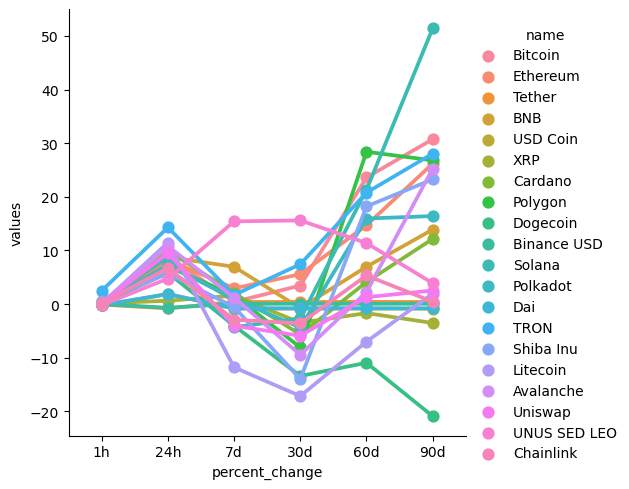

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [20]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,22451.95681,2023-03-13 05:50:06.382449+00:00


In [21]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data =df10)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>